In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd


# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [42]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [44]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.
Most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Most_recent_date)

('2017-08-23',)


In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

import datetime as dt
from dateutil.relativedelta import relativedelta

precipitation_date  = dt.date(2017, 8, 23) +relativedelta(months=-12)
print(precipitation_date)



2016-08-23


In [47]:
# Perform a query to retrieve the date and precipitation scores
date_prcp = session.query(Measurement.date,func.avg(Measurement.prcp)).\
    filter(Measurement.date>=precipitation_date).\
    group_by(Measurement.date).all()

print(date_prcp)

[('2016-08-23', 0.45166666666666666), ('2016-08-24', 1.5549999999999997), ('2016-08-25', 0.07714285714285715), ('2016-08-26', 0.016666666666666666), ('2016-08-27', 0.06399999999999999), ('2016-08-28', 0.5166666666666666), ('2016-08-29', 0.24333333333333332), ('2016-08-30', 0.011666666666666667), ('2016-08-31', 0.6359999999999999), ('2016-09-01', 0.006), ('2016-09-02', 0.05), ('2016-09-03', 0.254), ('2016-09-04', 0.276), ('2016-09-05', 0.08499999999999999), ('2016-09-06', 0.246), ('2016-09-07', 0.3333333333333333), ('2016-09-08', 0.07666666666666667), ('2016-09-09', 0.17833333333333332), ('2016-09-10', 0.27999999999999997), ('2016-09-11', 0.25), ('2016-09-12', 0.308), ('2016-09-13', 0.45166666666666666), ('2016-09-14', 2.3800000000000003), ('2016-09-15', 0.8266666666666667), ('2016-09-16', 0.11714285714285715), ('2016-09-17', 0.13599999999999998), ('2016-09-18', 0.10600000000000001), ('2016-09-19', 0.064), ('2016-09-20', 0.14714285714285716), ('2016-09-21', 0.19499999999999998), ('2016-

In [48]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Dataframe = pd.DataFrame(date_prcp, columns =['date', 'prcp'])
df = Dataframe.set_index('date')
df.head()

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


# Sort the dataframe by date

In [49]:
 df.sort_values(by='date', ascending = False, inplace = True) 

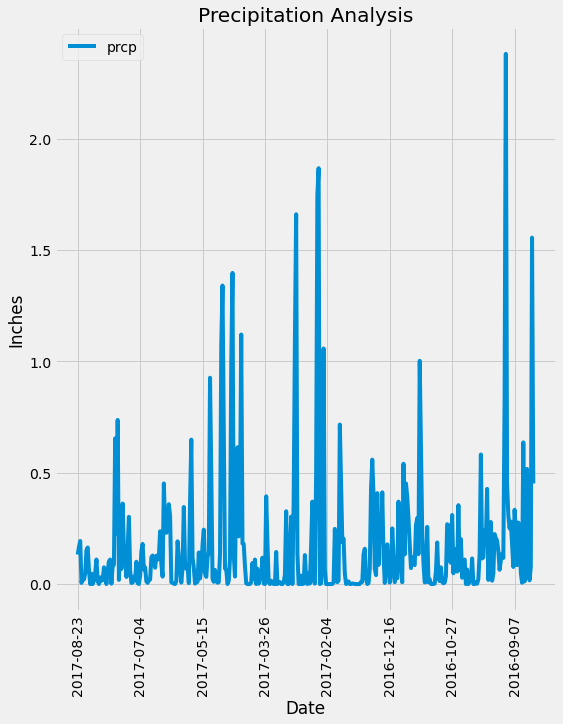

In [50]:

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8,10))
plt.xticks(rotation=90)
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
Total_stations = session.query(Station.station).group_by('station').count()
Total_stations

9

In [55]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
   order_by(func.count(Measurement.station).desc()).\
   group_by(Measurement.station).all()
print(Active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
   order_by(func.count(Measurement.station).desc()).\
   group_by(Measurement.station).first()

# Lowest Temprature

Most_active_station = Active_stations[0]
Most_active_station

lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == Most_active_station).all()
print(lowest_temp)


# Highest Temprature
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == Most_active_station).all()
print(highest_temp)

# Average Temprature
Average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == Most_active_station).all()
print(Average_temp)


[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement.date, Measurement.tobs).\
   filter(Measurement.station == Most_active_station).\
   order_by(Measurement.date.desc()).first()
most_active_station

('2017-08-18', 79.0)

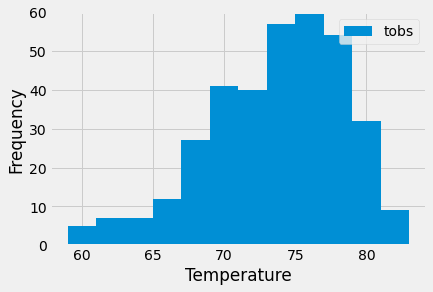

In [61]:
# Most recent date 2017-08-18 and tobs - 79

twelve_month_value = session.query(Measurement.date,Measurement.tobs).\
      filter(Measurement.station == Most_active_station).\
      filter(Measurement.date > '2016-08-17').all()

Final_station_df = pd.DataFrame(twelve_month_value)["tobs"]
Final_station_df

hist = Final_station_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,60)
plt.legend(["tobs"], loc = 'upper right')
plt.tight_layout
plt.show()

# Close session

In [62]:
# Close Session
session.close()